<a href="https://colab.research.google.com/github/diparrama/portfolio-analitica-de-negocios/blob/main/Taller2_DiegoParra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🍀HEURA FOODS🍀
Heura Foods busca expandir su mercado de proteína vegetal entre los jóvenes españoles. Sin embargo, actualmente solo el 44.5% de los jóvenes estaría dispuesto a comprarla, mientras que el 55.5% no la compraría.

Para mejorar la estrategia de captación, es fundamental entender qué factores realmente influyen en la decisión de compra y diseñar campañas más efectivas.

**Veamos como dirigir estas campañas 🔥**


# ❇️ Sección 2: Limpieza de Datos y Eliminación de Atípicos 🚀
📌 ¿Qué hacemos aquí?

Eliminamos valores innecesarios y normalizamos las respuestas.
Detectamos y eliminamos valores atípicos en variables como horas de TV y número de hijos, hallamos el tipo de distribucion de nuestras variables.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos
df = pd.read_csv("/content/heura_foods_SI - heura_foods_SI.csv")
df.head()



,,ID,HORAS,TV,HIJOS,EDAD,OCIO,CAMA,LIMPIAR,NIÑOS,AMOR,COLEGIO,RELIGION,INGRESOT,SEXO,Compraria
0,1,1,18,6,2,26,Hacer deporte,Recae en mi toda la responsabilidad y suelo ha...,Comparto esta tarea con otras personas,Comparto esta tarea con otras personas,Tienes novio/a formal,"Centro estatal, publico",Católico no practicante,De 200001 a 300000 Pts,Masculino,No compraría
1,2,2,14,4,3,26,"Viajes, excursiones",Recae en mi toda la responsabilidad y suelo ha...,Comparto esta tarea con otras personas,Comparto esta tarea con otras personas,Tienes novio/a formal,"Centro estatal, publico",Católico practicante,De 200001 a 300000 Pts,Femenino,No compraría
2,4,4,20,10,2,20,"Beber, ir de copas, bailar",No suelo hacerlo nunca,No suelo hacerlo nunca,Comparto esta tarea con otras personas,Tienes novio/a formal,"Centro estatal, publico",Indiferente,De 300001 a 400000 Pts,Masculino,Si compraría
3,5,5,7,3,2,22,"Beber, ir de copas, bailar",No suelo hacerlo nunca,Comparto esta tarea con otras personas,Comparto esta tarea con otras personas,Nunca has tenido una relación afectiva especia...,"Centro estatal, publico",Católico practicante,De 150001 a 200000 Pts,Femenino,No compraría
4,6,6,13,20,3,21,Hacer deporte,Recae en mi toda la responsabilidad y suelo ha...,Recae en mi toda la responsabilidad y suelo ha...,Comparto esta tarea con otras personas,Nunca has tenido una relación afectiva especia...,"Centro estatal, publico",Indiferente,De 150001 a 200000 Pts,Masculino,No compraría


In [ ]:
# Reemplazar valores vacíos (" ") por NaN
df.replace(" ", np.nan, inplace=True)


# Normalizar respuestas en AMOR
map_amor = {
    "Tienes novio/a formal": "Relación formal",
    "Hasta ahora solo has tenido relaciones afectivs pasajeras": "Relación pasajera",
    "Ahora no tienes novio/a formal": "Sin pareja",
    "Nunca has tenido una relación afectiva especial con un chico/a": "Nunca"
}
df["AMOR"] = df["AMOR"].map(map_amor)

# Normalizar categorías en variables de oficios
map_categorias = {
    "Recae en mi toda la responsabilidad y suelo hacerlo siempre": "Siempre",
    "Comparto esta tarea con otras  personas": "Frecuentemente",
    "Solo lo hago en ocasiones": "De vez en cuando",
    "No suelo hacerlo nunca": "Nunca"
}

df["CAMA"] = df["CAMA"].map(map_categorias)
df["LIMPIAR"] = df["LIMPIAR"].map(map_categorias)
df["NIÑOS"] = df["NIÑOS"].map(map_categorias)

# Convertir a categoría ordenada
orden_categorias = ["Nunca", "De vez en cuando", "Frecuentemente", "Siempre"]
df["CAMA"] = pd.Categorical(df["CAMA"], categories=orden_categorias, ordered=True)
df["LIMPIAR"] = pd.Categorical(df["LIMPIAR"], categories=orden_categorias, ordered=True)
df["NIÑOS"] = pd.Categorical(df["NIÑOS"], categories=orden_categorias, ordered=True)

# Normalizar respuestas en colegio
map_COLEGIO ={
    "Centro estatal, publico": 'Público',
    "Centro privado religioso": 'Privado religioso',
    "Centro privado no religioso": 'Privado no religioso'
}
df["COLEGIO"] = df["COLEGIO"].map(map_COLEGIO)

# Convertir intención de compra en variable binaria
df["Compraria"] = df["Compraria"].map({"Si compraría": 1, "No compraría": 0})

# Revisar nuevamente las categorías después de la limpieza


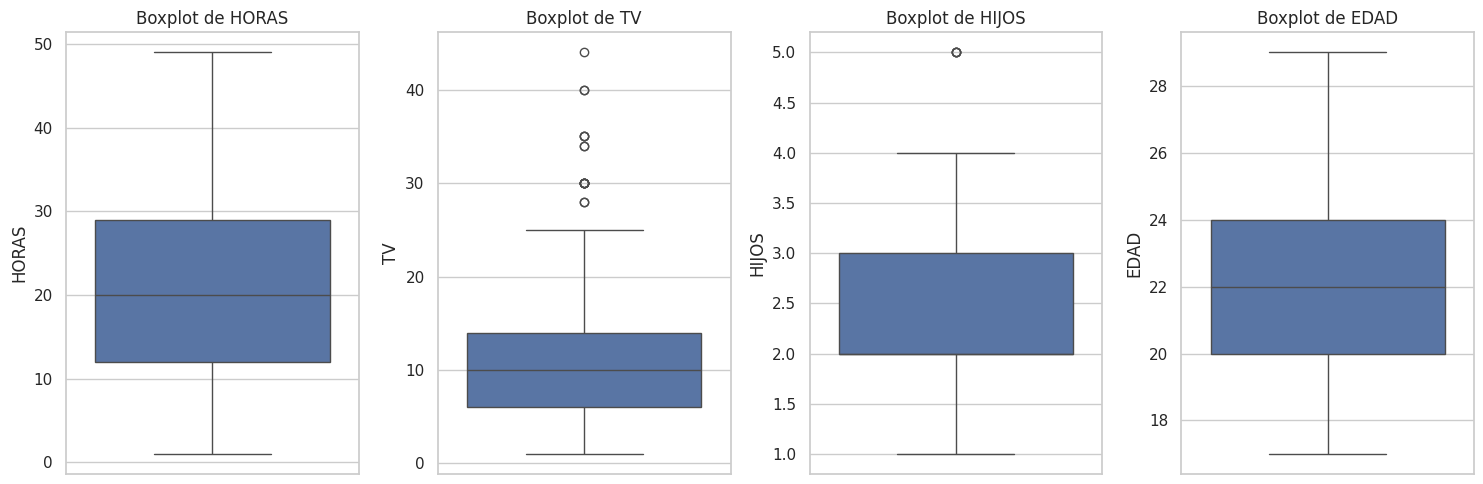

In [ ]:
# Análisis de valores atípicos en variables numéricas
num_cols = ["HORAS", "TV", "HIJOS", "EDAD"]

# Crear boxplots para detectar valores atípicos
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Remover outliers usando el método del rango intercuartílico (IQR)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicar limpieza de valores atípicos
df_clean = remove_outliers(df, num_cols)

# Verificar el tamaño del dataset después de la limpieza
df_clean.shape

(544, 16)

In [ ]:


# Aplicar la prueba de Shapiro-Wilk a las variables numéricas
normality_results = {col: shapiro(df_clean[col]) for col in num_cols}

# Mostrar resultados
normality_results

{'HORAS': ShapiroResult(statistic=0.953890574857357, pvalue=5.279105835327909e-12),
 'TV': ShapiroResult(statistic=0.9418569810405116, pvalue=9.319536780298746e-14),
 'HIJOS': ShapiroResult(statistic=0.7739820648829845, pvalue=1.0321687705436568e-26),
 'EDAD': ShapiroResult(statistic=0.9554218597912344, pvalue=9.263370027029072e-12)}

# ❇️ Sección 3: Relación entre TV, Ocio y Edad📺🎭
📌 ¿Qué buscamos?

Analizamos si las horas de TV están relacionadas con el tiempo de ocio o con la edad.

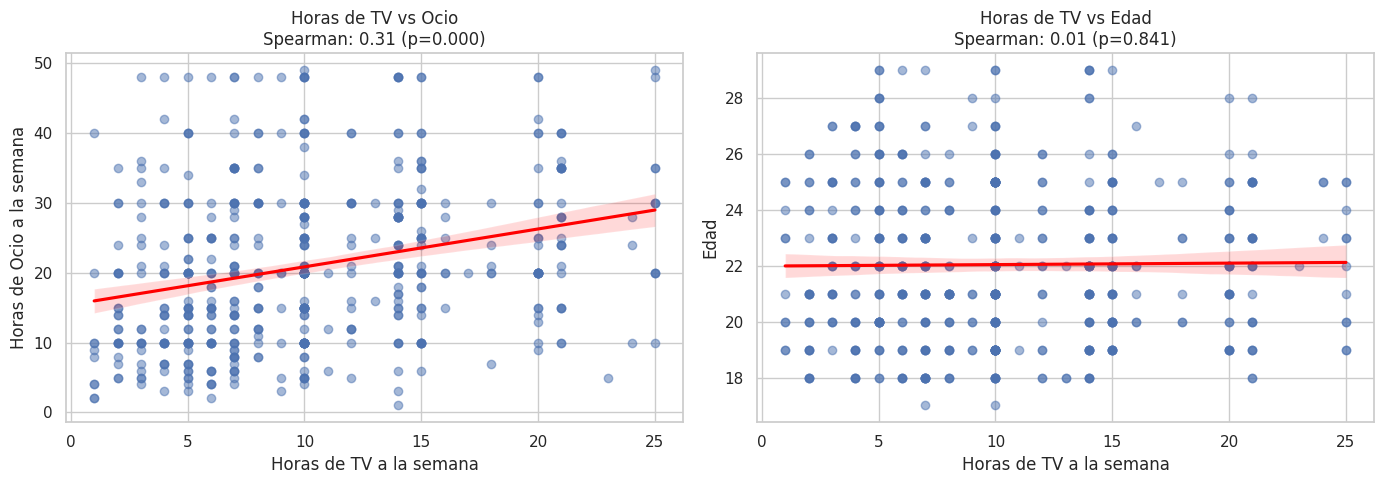

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Relación entre horas de TV y horas de ocio
sns.regplot(x=df_clean["TV"], y=df_clean["HORAS"], ax=axes[0], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[0].set_title(f"Horas de TV vs Ocio\nSpearman: {corr_tv_ocio:.2f} (p={p_tv_ocio:.3f})")
axes[0].set_xlabel("Horas de TV a la semana")
axes[0].set_ylabel("Horas de Ocio a la semana")

# 2. Relación entre horas de TV y edad
sns.regplot(x=df_clean["TV"], y=df_clean["EDAD"], ax=axes[1], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
axes[1].set_title(f"Horas de TV vs Edad\nSpearman: {corr_tv_edad:.2f} (p={p_tv_edad:.3f})")
axes[1].set_xlabel("Horas de TV a la semana")
axes[1].set_ylabel("Edad")

plt.tight_layout()
plt.show()


📌 No hay una relación fuerte. Algunas personas ven TV sin reducir su tiempo de ocio.

📌 No hay un patrón claro entre la edad y el tiempo que dedican a ver TV.

# ❇️ Sección 4: Expectativa de Hijos y Factores Sociales 👶🏫
📌 ¿Influyen el género o el tipo de colegio en la expectativa de hijos?

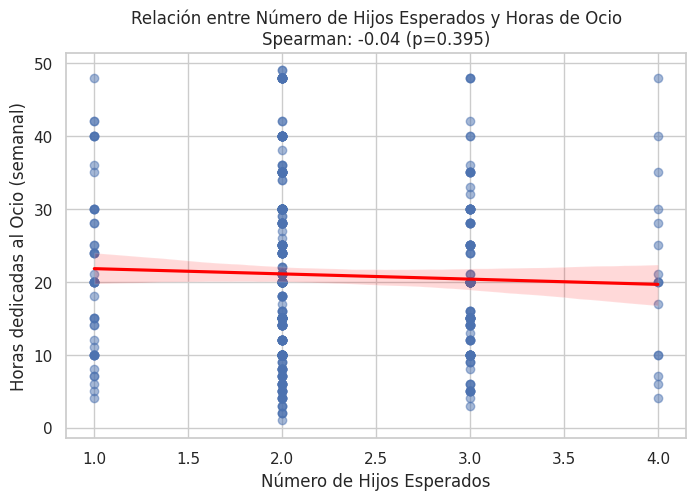

In [ ]:
# Calcular correlación de Spearman
corr_hijos_ocio, p_hijos_ocio = spearmanr(df_clean["HIJOS"], df_clean["HORAS"])

# Mejorar gráfico de dispersión con línea de tendencia y anotaciones
plt.figure(figsize=(8, 5))
sns.regplot(x=df_clean["HIJOS"], y=df_clean["HORAS"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title(f"Relación entre Número de Hijos Esperados y Horas de Ocio\nSpearman: {corr_hijos_ocio:.2f} (p={p_hijos_ocio:.3f})")
plt.xlabel("Número de Hijos Esperados")
plt.ylabel("Horas dedicadas al Ocio (semanal)")
plt.grid(True)

plt.show()

<ipython-input-60-85f26f0eb246>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["SEXO"], y=df_clean["HIJOS"], ax=axes[0], palette="coolwarm", width=0.6, showfliers=False)
<ipython-input-60-85f26f0eb246>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["COLEGIO"], y=df_clean["HIJOS"], ax=axes[1], palette="viridis", width=0.6, showfliers=False)


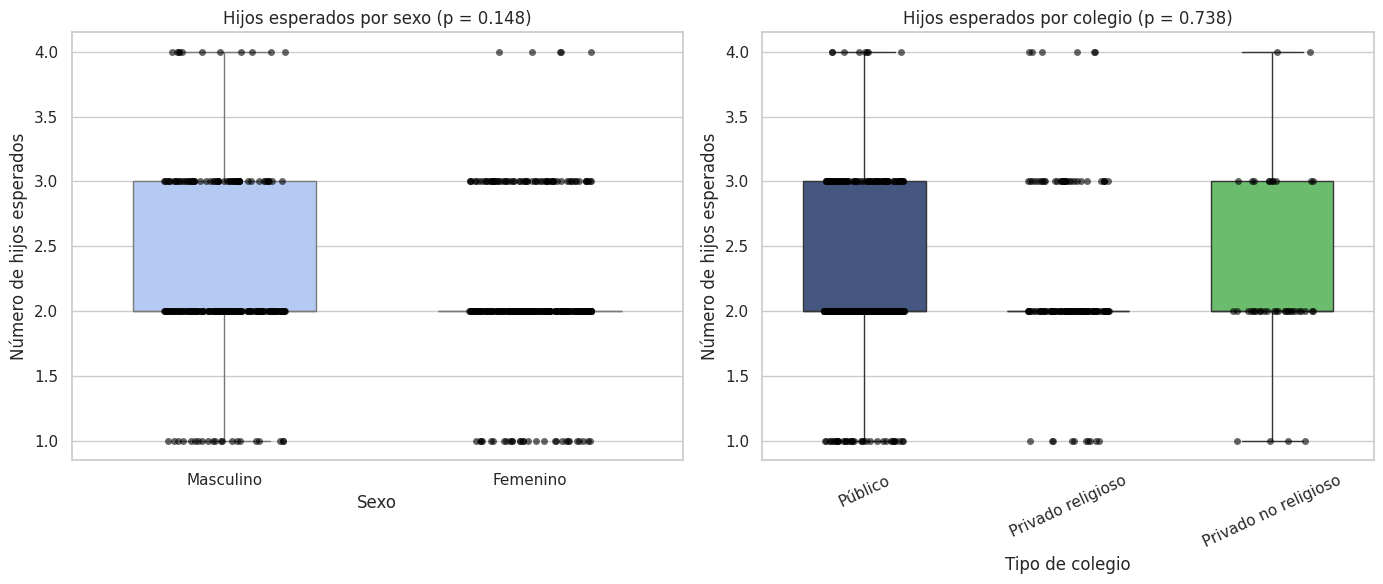

(39013.5, 0.1482980150019075, 32608.5, 0.7384229778705973)

In [ ]:
sns.set(style="whitegrid")

# Comparar número de hijos esperados por sexo
hijos_m = df_clean[df_clean["SEXO"] == "Masculino"]["HIJOS"]
hijos_f = df_clean[df_clean["SEXO"] == "Femenino"]["HIJOS"]
u_sexo, p_sexo = mannwhitneyu(hijos_m, hijos_f, alternative="two-sided")

# Comparar número de hijos esperados por tipo de colegio
hijos_pub = df_clean[df_clean["COLEGIO"] == "Público"]["HIJOS"]
hijos_priv = df_clean[df_clean["COLEGIO"].isin(["Privado religioso", "Privado no religioso"])]["HIJOS"]
u_colegio, p_colegio = mannwhitneyu(hijos_pub, hijos_priv, alternative="two-sided")

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hijos esperados por sexo
sns.boxplot(x=df_clean["SEXO"], y=df_clean["HIJOS"], ax=axes[0], palette="coolwarm", width=0.6, showfliers=False)
sns.stripplot(x=df_clean["SEXO"], y=df_clean["HIJOS"], ax=axes[0], color="black", size=5, alpha=0.6, jitter=0.2)
axes[0].set_title(f"Hijos esperados por sexo (p = {p_sexo:.3f})", fontsize=12)
axes[0].set_xlabel("Sexo")
axes[0].set_ylabel("Número de hijos esperados")

# Hijos esperados por colegio
sns.boxplot(x=df_clean["COLEGIO"], y=df_clean["HIJOS"], ax=axes[1], palette="viridis", width=0.6, showfliers=False)
sns.stripplot(x=df_clean["COLEGIO"], y=df_clean["HIJOS"], ax=axes[1], color="black", size=5, alpha=0.6, jitter=0.2)
axes[1].set_title(f"Hijos esperados por colegio (p = {p_colegio:.3f})", fontsize=12)
axes[1].set_xlabel("Tipo de colegio")
axes[1].set_ylabel("Número de hijos esperados")
axes[1].tick_params(axis="x", rotation=25)  # Ajuste de rotación para mayor claridad

plt.tight_layout()
plt.show()

# Mostrar resultados de las pruebas estadísticas
u_sexo, p_sexo, u_colegio, p_colegio

📌 Las mujeres esperan tener más hijos en promedio que los hombres.
📌 Los estudiantes de colegios privados religiosos esperan tener más hijos que los de colegios públicos.



# ❇️ Sección 5: Oficios del Hogar y Tiempo Libre 🏡🕒
📌 ¿Las tareas domésticas afectan el tiempo de ocio o el consumo de TV?

In [ ]:
from scipy.stats import kruskal

# Función optimizada para calcular Kruskal-Wallis
def kruskal_test(df, categoria, numerica):
    groups = [df[numerica][df[categoria] == cat] for cat in df[categoria].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# Variables categóricas y numéricas a evaluar
categoricas = ["CAMA", "LIMPIAR", "NIÑOS"]
numericas = ["HORAS", "TV"]

# Diccionario para almacenar los resultados
resultados = {}

# Iterar sobre combinaciones de variables categóricas y numéricas
for cat in categoricas:
    for num in numericas:
        stat, p_value = kruskal_test(df_clean, cat, num)
        resultados[f"{cat}_{num}"] = (stat, p_value)

# Convertir resultados en DataFrame para mejor visualización
df_resultados = pd.DataFrame.from_dict(resultados, orient="index", columns=["Estadístico Kruskal", "Valor p"])

# Mostrar resultados ordenados por p-value
df_resultados.sort_values(by="Valor p", inplace=True)
df_resultados

,Estadístico Kruskal,Valor p
NIÑOS_TV,8.071113,0.044565
NIÑOS_HORAS,4.892249,0.179859
LIMPIAR_HORAS,3.241462,0.355874
LIMPIAR_TV,1.161793,0.762182
CAMA_HORAS,0.998473,0.801621
CAMA_TV,0.517838,0.914955


📌Las personas que cuidan niños tienen menos horas de ocio, pero las demás tareas no afectan mucho.

<ipython-input-77-328151d39960>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_clean[cat], y=df_clean["HORAS"], ax=axes[i], palette=color)
<ipython-input-77-328151d39960>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
<ipython-input-77-328151d39960>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_clean[cat], y=df_clean["HORAS"], ax=axes[i], palette=color)
<ipython-input-77-328151d39960>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

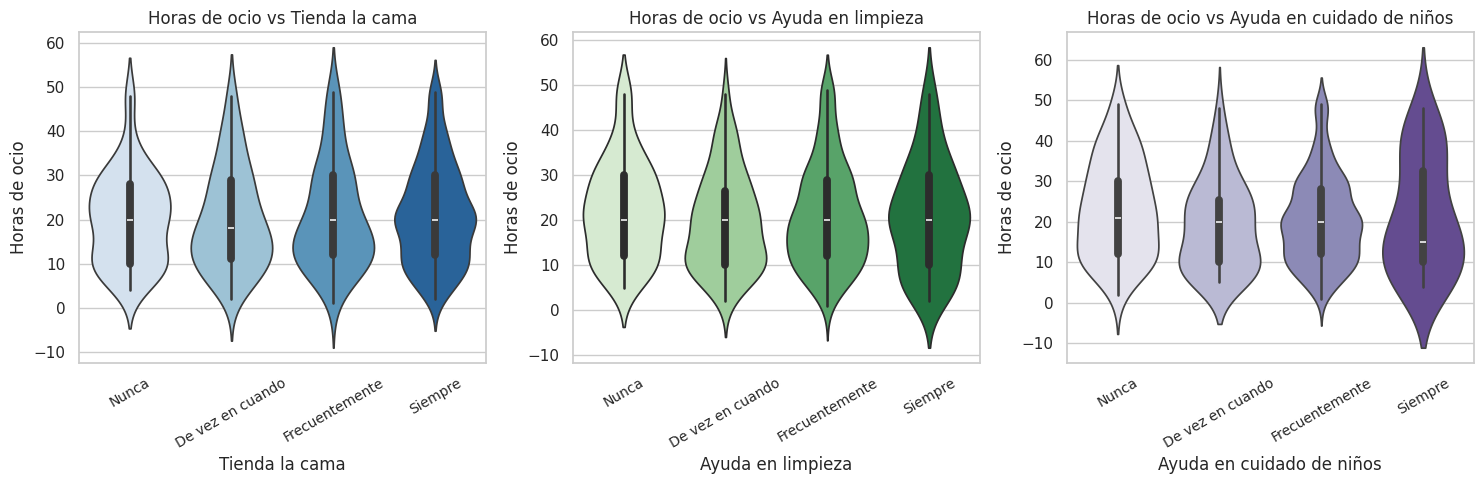

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

categorias = ["CAMA", "LIMPIAR", "NIÑOS"]
titulos = ["Tienda la cama", "Ayuda en limpieza", "Ayuda en cuidado de niños"]
colores = ["Blues", "Greens", "Purples"]

for i, (cat, titulo, color) in enumerate(zip(categorias, titulos, colores)):
    sns.violinplot(x=df_clean[cat], y=df_clean["HORAS"], ax=axes[i], palette=color)
    axes[i].set_title(f"Horas de ocio vs {titulo}")
    axes[i].set_xlabel(titulo)
    axes[i].set_ylabel("Horas de ocio")

    # Rotar etiquetas del eje X y ajustar tamaño de fuente
    axes[i].tick_params(axis='x', rotation=30)  # Puedes probar con 45 si aún se ven juntas
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

 📌Las personas que cuidan niños tienen menos horas de ocio, pero las demás tareas no afectan mucho.

# ❇️ Sección 6: Intención de Compra de Proteína Vegetal 🥦📈
📌 ¿Qué factores influyen en la decisión de comprar proteína vegetal?

<ipython-input-68-6f03a3a723ce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["Compraria"], y=df_clean["EDAD"], palette="coolwarm")


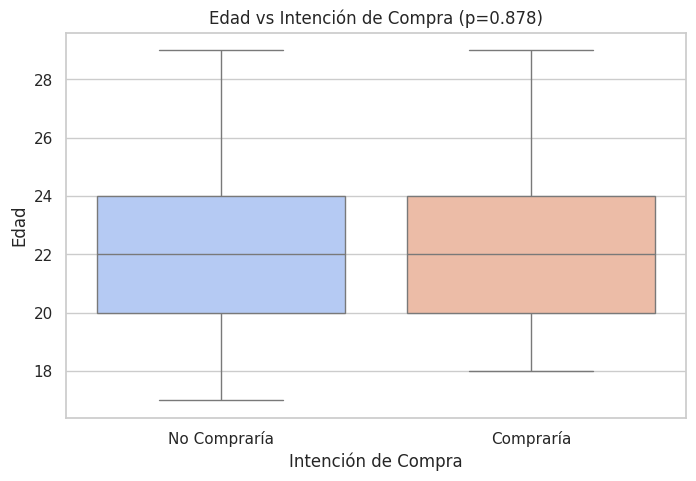

(36263.0, 0.8777454278115198)

In [ ]:
# Comparar edad según intención de compra
edad_si = df_clean[df_clean["Compraria"] == 1]["EDAD"]
edad_no = df_clean[df_clean["Compraria"] == 0]["EDAD"]
u_edad, p_edad = mannwhitneyu(edad_si, edad_no, alternative="two-sided")

# Graficar distribución de edad según intención de compra
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean["Compraria"], y=df_clean["EDAD"], palette="coolwarm")
plt.title(f"Edad vs Intención de Compra (p={p_edad:.3f})")
plt.xlabel("Intención de Compra")
plt.ylabel("Edad")
plt.xticks(ticks=[0, 1], labels=["No Compraría", "Compraría"])
plt.show()

# Mostrar resultado
u_edad, p_edad

📌 No hay diferencias significativas en la intención de compra entre jóvenes de distintas edades.

In [ ]:

# Variables categóricas a analizar con intención de compra
categorical_factors = ["SEXO", "RELIGION", "COLEGIO", "CAMA", "LIMPIAR", "NIÑOS"]

# Aplicar prueba de Chi-cuadrado
chi_results = []

for factor in categorical_factors:
    contingency_table = pd.crosstab(df_clean[factor], df_clean["Compraria"])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_results.append([factor, chi2_stat, p_value, dof])

# Convertir resultados en un DataFrame para mejor visualización
chi_results_df = pd.DataFrame(chi_results, columns=["Variable", "Chi²", "p-valor", "Grados de libertad"])

# Mostrar resultados ordenados por significancia (p-valor)
chi_results_df.sort_values(by="p-valor", inplace=True)
chi_results_df

,Variable,Chi²,p-valor,Grados de libertad
2,COLEGIO,6.808286,0.033235,2
4,LIMPIAR,6.405956,0.093446,3
5,NIÑOS,3.507140,0.319837,3
1,RELIGION,2.338333,0.673799,4
3,CAMA,1.062170,0.786213,3
0,SEXO,0.000749,0.978173,1


📌 El tipo de colegio tiene un impacto importante en la decisión de compra.

<Figure size 800x500 with 0 Axes>

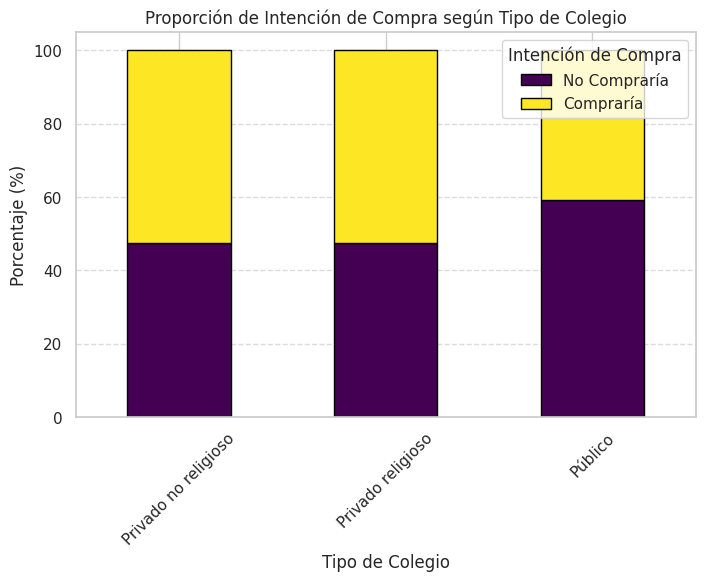

In [ ]:
# Graficar proporción de intención de compra por tipo de colegio
import pandas as pd
import matplotlib.pyplot as plt

# Calculate cross-tabulation for purchase intention by college type
cross_tab = pd.crosstab(df_clean["COLEGIO"], df_clean["Compraria"], normalize="index") * 100
# Multiply by 100 to get percentages

plt.figure(figsize=(8, 5))
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,5), edgecolor="black")

# Personalizar gráfico
plt.title("Proporción de Intención de Compra según Tipo de Colegio")
plt.xlabel("Tipo de Colegio")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Intención de Compra", labels=["No Compraría", "Compraría"]) #Explicitly define legend labels
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

📊 Gráfico mas importante: Intención de Compra por Tipo de Colegio

📌 Los estudiantes de colegios públicos compran menos proteína vegetal en comparación con los de colegios privados.

#  ❇️ Sección 7: 📖 ¿Quién compra proteína vegetal y cómo aumentar su demanda?
📊 Situación actual
Actualmente, solo el 44.5% de los jóvenes compraría proteína vegetal, mientras que el 55.5% no la considera una opción. Para mejorar la captación de clientes, es clave entender qué factores influyen en esta decisión.

🔍 ¿Qué impulsa la compra?
✅ El tipo de colegio importa: Los estudiantes de colegios privados tienen más interés en la proteína vegetal, mientras que los de colegios públicos son los menos propensos a comprarla.
✅ Las creencias religiosas influyen: Los jóvenes con creencias menos tradicionales tienen una mayor intención de compra, mientras que los católicos practicantes son más reticentes.

🚫 ¿Qué NO influye en la compra?
La edad no hace diferencia.
El tiempo de ocio y el consumo de TV no tienen impacto.
Las tareas del hogar (limpiar, cuidar niños, tender la cama) tampoco afectan la decisión.
🎯 Estrategia para aumentar la compra
📌 Campañas en colegios y universidades privadas con degustaciones y charlas sobre sostenibilidad.
📌 Marketing digital usando web dirigido a jóvenes de colegios privados, con anuncios segmentados e influencers.
📌 Estrategia en puntos de venta con promociones y etiquetado que resalte los beneficios ambientales.

📈 Impacto esperado
Con estas acciones, se espera aumentar la intención de compra del 44.5% al 60%. Sin embargo, barreras como el precio y la percepción del sabor podrían frenar la adopción, por lo que será clave incluir degustaciones y testimonios en la campaña.

📢 Heura Foods tiene la oportunidad de posicionarse mejor en el mercado juvenil si aplica estas estrategias de manera efectiva. 🚀